# Генерація дерев

- Умови діріхлет із нулем на всіх границях
    - Прикладове дерево, котре генерувалося 8 годин
    - Такі самі дерева, в геометрії 1 на 1 і dx змінюємо від 0 до 1 із якимись кроком
    - Такі самі дерева, в геометрії 4 на 4 і dx змінюємо від 0 до 4 із якимись кроком
    - Такі самі дерева, в геометрії 4 на 20 і dx змінюємо від 0 до 4 із якимисьм кроком
    - Кругла геометрія із діаметром 2.
    - Кругла геометрія із діаметром 5.
 - Умови діріхлета, але з вільними умовами на границі
 - Умови лапласа
 - Для різних значеннь тета
 - Для різних значеннь порогу біфуркації
 - І все те саме тільки для статистичної біфуркації.

 Сумарно виходить десь біля 100 різних симуляцій..

 Візьмемо параметри із 8годинної моделі, оскільки я їх обговорював із Петром:

 - мінімальна відстань біфуркації - 0.01. Але це значення було все ж за великим, адже не гістограмі було видно, що в якийсь момент воно вперлося в цю межу. тому візьмемо 0.005.
 - крок симуляції теж візьмемо 0.005
 - мінімальну відстань росту так само 0.005

 тепер, що до інших чисельних параметрів:
 - квадратура може нехай буде 4и. 
 - додамо все ж одну адптацію сітки.

 Чисельні параметри сітки:
 - довжина ігнорування згладження - 0.02
 - кут згладження - 0.2


In [1]:
import riversimdefs as rs

## Умови діріхлет із нулем на всіх границях

### Дерева в геометрії 1 на 1 і dx змінюємо від 0 до 1 із достатньо малим кроком

different_dx_rivers_generation__dirichlet__width=1.0__heigth=1.0__ds=0.005__bifurcation_min_dist=0.005__eta=1.0__dx=0.03
0
10
20
30
40
50
60
70
80
90
100

110
120
130
140
150
160
170
180
different_dx_rivers_generation__dirichlet__width=1.0__heigth=1.0__ds=0.005__bifurcation_min_dist=0.005__eta=1.0__dx=0.124
0
10
20
30
40
50
60
70
80
90
100

110
120
130
140
150
160
170
180
190
200
different_dx_rivers_generation__dirichlet__width=1.0__heigth=1.0__ds=0.005__bifurcation_min_dist=0.005__eta=1.0__dx=0.218
0
10
20
30
40
50
60
70
80
90
100

110
120
130
140
150
160
170
180
190
different_dx_rivers_generation__dirichlet__width=1.0__heigth=1.0__ds=0.005__bifurcation_min_dist=0.005__eta=1.0__dx=0.31200000000000006
0
10
20
30
40
50
60
70
80
90
100

110
120
130
140
150
160
170
180
different_dx_rivers_generation__dirichlet__width=1.0__heigth=1.0__ds=0.005__bifurcation_min_dist=0.005__eta=1.0__dx=0.406
0
10
20
30
40
50
60
70
80
90
100

110
120
130
140
150


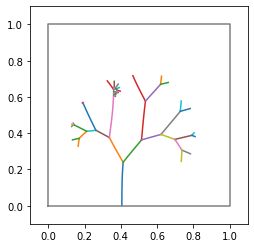

In [1]:
import riversimdefs as rs
import numpy as np

model = rs.Model()

name_prefix = "different_dx_rivers_generation__dirichlet_2"
model.growth_type = 1
model.growth_threshold = 0.0001
model.mesh_params.ignored_smoothness_length = 0
model.mesh_params.smoothness_degree = 0
model.solver_params.adaptive_refinment_steps = 1
model.solver_params.quadrature_degree = 4

model.number_of_steps = 300

model.ds = 0.005
model.width = 1.
model.height = 1.
model.eta = 1.

outputs = {}
ddx = (model.width / 2. -model.integr_params.integration_radius) / 5.
for model.dx in np.arange(model.integr_params.integration_radius, model.width / 2., ddx):
    key = name_prefix + "__width=" + str(model.width) + "__heigth=" + str(model.height) + "__ds="+str(model.ds) + "__bifurcation_min_dist=" + str(model.bifurcation_min_dist) + "__eta=" + str(model.eta) + "__dx=" + str(model.dx)
    print(key)

    model.initializeDirichlet()
    model.rivers[1].addPoint(rs.Polar(model.integr_params.integration_radius, 0), model.region_params.river_boundary_id)
    try:
        outputs[key] = rs.growRiver(model, plot_period = 50, debug = False)
    except:
        print("catched error.")
        break
    
    rs.save(model, key + ".json")

new_integr_radius_0.01weight_rad_0.01
0
10
20
30
40
50
60
70
80
90
100

110
new_integr_radius_0.01weight_rad_0.04
0
10
20
30
40
50
60
70
80
90
100

110
new_integr_radius_0.01weight_rad_0.06999999999999999
0
10
20
30
40
50
60
70
80
90
100

110
new_integr_radius_0.01weight_rad_0.09999999999999999
0
10
20
30
40
50
60
70
80
90
100

110
new_integr_radius_0.04weight_rad_0.01
0
10
20
30
40
50
60
70
80
90
100

110
new_integr_radius_0.04weight_rad_0.04
0
10
20
30
40
50
60
70
80
90
100

110
new_integr_radius_0.04weight_rad_0.06999999999999999
0
10
20
30
40
50
60
70
80
90
100

110
new_integr_radius_0.04weight_rad_0.09999999999999999
0
10
20
30
40
50
60
70
80
90
100

110
new_integr_radius_0.06999999999999999weight_rad_0.01
0
10
20
30
40
50
60
70
80
90
100

new_integr_radius_0.06999999999999999weight_rad_0.04
0
10
20
30
40
50
60
70
80
90
100

new_integr_radius_0.06999999999999999weight_rad_0.06999999999999999
0
10
20
30
40
50
60
70
80
90
100

new_integr_radius_0.06999999999999999weight_rad_0.099999

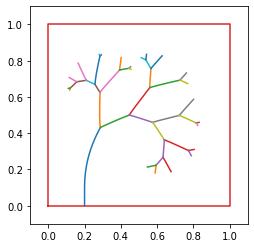

In [1]:
import riversimdefs as rs
import numpy as np

model = rs.Model()

model.growth_type = 1
#model.growth_min_distance = 0.005
#model.growth_threshold = 0.0001
model.mesh_params.ignored_smoothness_length = 0
model.mesh_params.smoothness_degree = 0.01
#model.solver_params.adaptive_refinment_steps = 1
#model.solver_params.quadrature_degree = 4

model.number_of_steps = 240

#model.ds = 0.005
#model.bifurcation_min_dist = 0.005
#model.width = 1.
#model.height = 1.
#model.eta = 1.

outputs = {}
for model.integr_params.integration_radius in np.arange(0.01, 0.1, 0.03):
    for model.integr_params.weigth_func_radius in np.arange(0.01, 0.1, 0.03):
        key = "new_integr_radius_" + str(model.integr_params.integration_radius) + "weight_rad_" + str(model.integr_params.weigth_func_radius)
        print(key)

        model.initializeDirichlet()
        model.rivers[1].addPoint(rs.Polar(model.integr_params.integration_radius, 0), model.region_params.river_boundary_id)
        try:
            outputs[key] = rs.growRiver(model, plot_period = 25, debug = False)
        except:
            print("catched error.")
            break
    
        rs.save(model, key + ".json")

In [1]:
import riversimdefs as rs

model = rs.Model()
rs.open(model, "debug 210.json")
model.rivers.removeTipPoints()
rs.plot(model, plot_limits=[0.6, 0.7, 0.6, 0.7])

boundary = rs.BoundaryGenerator(model.sources, model.region, model.rivers, model.region_params)

rs.NumOfBoundaryIntersection(boundary, model.rivers.tipBoundary())
model.number_of_steps = 2
rs.growRiver(model)

0
